In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

#### 로지스틱 회귀 적용

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


#### classification_report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



- marco avg: (0.68 + 0.77) / 2 = 0.725
- weighted avg: 0.68 * (477 / 1300) + 0.77 * (823 / 1300) = 0.7369

#### confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

![cm](../data/cm.png)

#### precision_recall curve

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

%matplotlib inline

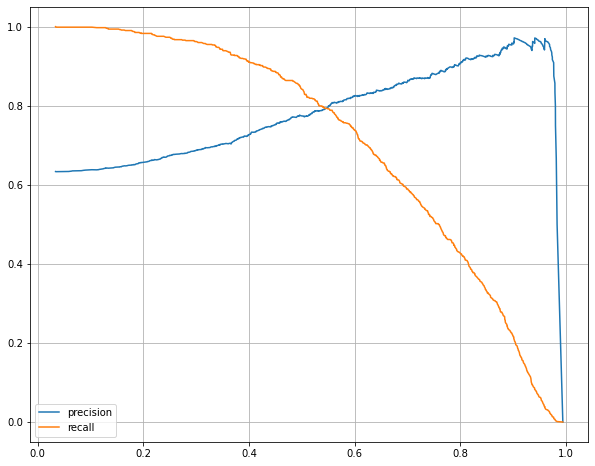

In [10]:
plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1] # 클래스별 확률 계산, 1일 때

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid(); plt.legend(); plt.show()

In [11]:
# threshold = 0.5
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40540267, 0.59459733],
       [0.50945432, 0.49054568],
       [0.10220039, 0.89779961]])

In [12]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [15]:
y_pred_test.shape

(1300,)

In [16]:
y_pred_test.reshape(-1, 1).shape

(1300, 1)

In [17]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40540267, 0.59459733, 1.        ],
       [0.50945432, 0.49054568, 0.        ],
       [0.10220039, 0.89779961, 1.        ],
       ...,
       [0.2255042 , 0.7744958 , 1.        ],
       [0.67385519, 0.32614481, 0.        ],
       [0.31443691, 0.68556309, 1.        ]])

#### threshold 바꿔 보기 - Binarizer

In [21]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [23]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [22]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



- precision은 올라갔으나, recall은 떨어졌다
- 좋은 것인가?